In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import copy as cp
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv("../data/raw/d_train.csv")

In [8]:
train.head()

,id,gender,age,date,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
0,1,1,41,12/10/2017,24.96,23.10,99.59,20.23,76.88,49.60,...,166.0,9.9,17.4,0.164,54.1,34.2,6.5,4.7,0.6,6.06
1,2,1,41,19/10/2017,24.57,36.25,67.21,79.00,79.43,47.76,...,277.0,9.2,10.3,0.260,52.0,36.7,5.8,4.7,0.8,5.39
2,3,1,46,26/10/2017,20.82,15.23,63.69,38.17,86.23,48.00,...,241.0,8.3,16.6,0.199,48.1,40.3,7.7,3.2,0.8,5.59
3,4,0,22,25/10/2017,14.99,10.59,74.08,20.22,70.98,44.02,...,252.0,10.3,10.8,0.260,41.7,46.5,6.7,4.6,0.5,4.30
4,5,0,48,26/10/2017,20.07,14.78,75.79,22.72,78.05,41.83,...,316.0,11.1,14.0,0.350,56.6,33.1,9.1,0.6,0.6,5.42


In [9]:
train.describe()

,id,gender,age,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
count,5642.000000,5642.000000,5642.000000,4421.000000,4421.00000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,...,5626.000000,5619.000000,5619.000000,5619.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5642.000000
mean,2866.184155,0.509926,45.580468,26.805892,27.65202,87.482278,38.823762,76.771108,45.822504,30.948604,...,253.085318,10.653444,13.304414,0.267907,56.718468,33.778546,6.856772,2.043797,0.603697,5.631925
std,1655.555649,0.499946,12.961946,13.563003,22.61152,25.630897,40.788282,4.016055,2.617401,3.565997,...,59.586828,0.985484,2.173716,0.060503,7.799940,7.253097,1.567583,1.710901,0.291760,1.544882
min,1.000000,0.000000,3.000000,10.040000,0.12000,22.980000,6.360000,57.320000,29.540000,7.060000,...,37.000000,7.100000,8.000000,0.042000,14.400000,7.500000,3.100000,0.000000,0.000000,3.070000
25%,1433.250000,0.000000,35.000000,20.250000,15.13000,70.370000,17.810000,74.190000,44.130000,28.570000,...,213.000000,10.000000,11.700000,0.230000,51.600000,28.800000,5.800000,0.900000,0.400000,4.920000
50%,2870.500000,1.000000,45.000000,23.890000,21.48000,84.470000,26.190000,76.630000,45.820000,30.780000,...,249.000000,10.600000,12.900000,0.260000,56.700000,33.600000,6.700000,1.600000,0.600000,5.290000
75%,4302.750000,1.000000,54.000000,29.270000,32.30000,100.210000,43.850000,79.530000,47.570000,33.180000,...,289.000000,11.300000,14.600000,0.300000,62.000000,38.500000,7.700000,2.600000,0.700000,5.767500
max,5732.000000,1.000000,93.000000,434.950000,498.89000,374.320000,736.990000,100.410000,54.080000,66.180000,...,745.000000,15.200000,25.300000,0.710000,88.500000,76.300000,23.200000,22.500000,3.500000,38.430000


In [10]:
train.pop("id")
train.pop("date")
train.describe()

,gender,age,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,白球比例,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
count,5642.000000,5642.000000,4421.000000,4421.00000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,...,5626.000000,5619.000000,5619.000000,5619.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5642.000000
mean,0.509926,45.580468,26.805892,27.65202,87.482278,38.823762,76.771108,45.822504,30.948604,1.502538,...,253.085318,10.653444,13.304414,0.267907,56.718468,33.778546,6.856772,2.043797,0.603697,5.631925
std,0.499946,12.961946,13.563003,22.61152,25.630897,40.788282,4.016055,2.617401,3.565997,0.220621,...,59.586828,0.985484,2.173716,0.060503,7.799940,7.253097,1.567583,1.710901,0.291760,1.544882
min,0.000000,3.000000,10.040000,0.12000,22.980000,6.360000,57.320000,29.540000,7.060000,0.520000,...,37.000000,7.100000,8.000000,0.042000,14.400000,7.500000,3.100000,0.000000,0.000000,3.070000
25%,0.000000,35.000000,20.250000,15.13000,70.370000,17.810000,74.190000,44.130000,28.570000,1.360000,...,213.000000,10.000000,11.700000,0.230000,51.600000,28.800000,5.800000,0.900000,0.400000,4.920000
50%,1.000000,45.000000,23.890000,21.48000,84.470000,26.190000,76.630000,45.820000,30.780000,1.490000,...,249.000000,10.600000,12.900000,0.260000,56.700000,33.600000,6.700000,1.600000,0.600000,5.290000
75%,1.000000,54.000000,29.270000,32.30000,100.210000,43.850000,79.530000,47.570000,33.180000,1.630000,...,289.000000,11.300000,14.600000,0.300000,62.000000,38.500000,7.700000,2.600000,0.700000,5.767500
max,1.000000,93.000000,434.950000,498.89000,374.320000,736.990000,100.410000,54.080000,66.180000,7.120000,...,745.000000,15.200000,25.300000,0.710000,88.500000,76.300000,23.200000,22.500000,3.500000,38.430000


In [14]:
train.describe(percentiles =[0.1,0.9])

,gender,age,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,白球比例,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
count,5642.000000,5642.000000,4421.000000,4421.00000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,...,5626.000000,5619.000000,5619.000000,5619.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5642.000000
mean,0.509926,45.580468,26.805892,27.65202,87.482278,38.823762,76.771108,45.822504,30.948604,1.502538,...,253.085318,10.653444,13.304414,0.267907,56.718468,33.778546,6.856772,2.043797,0.603697,5.631925
std,0.499946,12.961946,13.563003,22.61152,25.630897,40.788282,4.016055,2.617401,3.565997,0.220621,...,59.586828,0.985484,2.173716,0.060503,7.799940,7.253097,1.567583,1.710901,0.291760,1.544882
min,0.000000,3.000000,10.040000,0.12000,22.980000,6.360000,57.320000,29.540000,7.060000,0.520000,...,37.000000,7.100000,8.000000,0.042000,14.400000,7.500000,3.100000,0.000000,0.000000,3.070000
10%,0.000000,29.000000,17.800000,11.60000,59.400000,13.520000,71.710000,42.530000,26.690000,1.260000,...,184.000000,9.500000,10.800000,0.198000,46.800000,24.700000,5.100000,0.600000,0.300000,4.640000
50%,1.000000,45.000000,23.890000,21.48000,84.470000,26.190000,76.630000,45.820000,30.780000,1.490000,...,249.000000,10.600000,12.900000,0.260000,56.700000,33.600000,6.700000,1.600000,0.600000,5.290000
90%,1.000000,63.000000,37.670000,48.80000,117.360000,73.870000,81.900000,49.140000,35.420000,1.770000,...,328.500000,11.900000,16.500000,0.340000,66.500000,43.100000,8.800000,4.100000,1.000000,6.680000
max,1.000000,93.000000,434.950000,498.89000,374.320000,736.990000,100.410000,54.080000,66.180000,7.120000,...,745.000000,15.200000,25.300000,0.710000,88.500000,76.300000,23.200000,22.500000,3.500000,38.430000


In [ ]:
train_bk = cp.deepcopy(train)
for column in train.columns:
    train_bk[column] = train_bk[column].apply(lambda x : np.log1p(x))

age


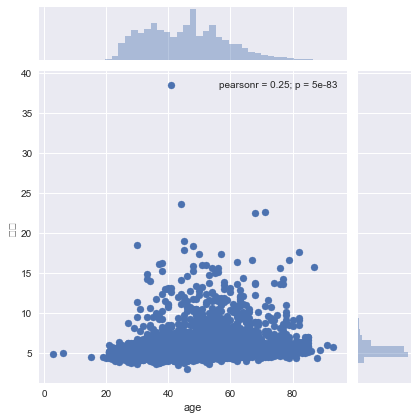

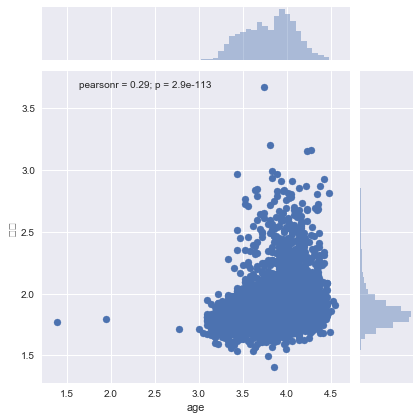

*天门冬氨酸氨基转换酶


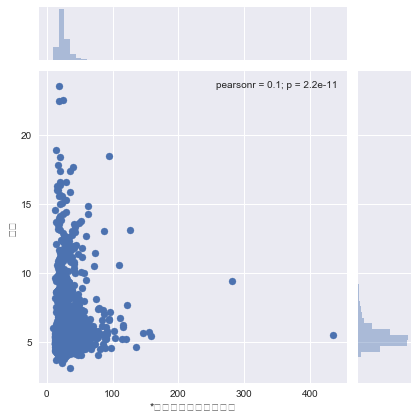

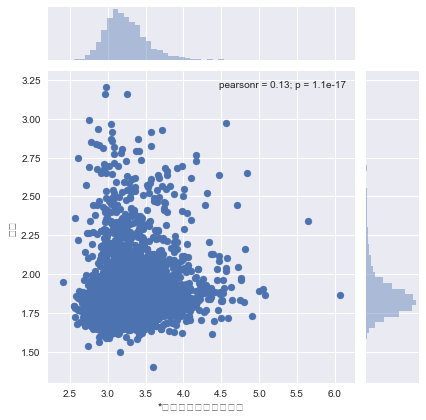

*丙氨酸氨基转换酶


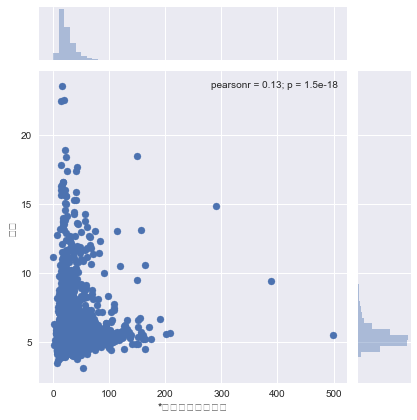

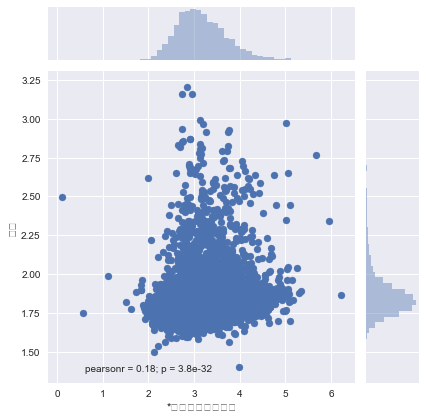

*碱性磷酸酶


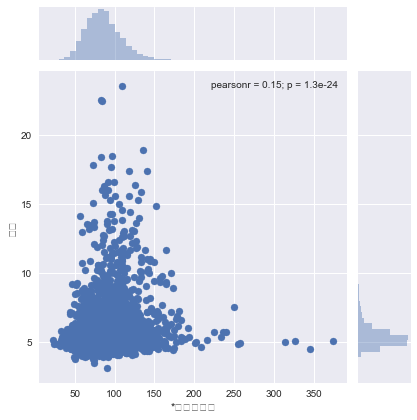

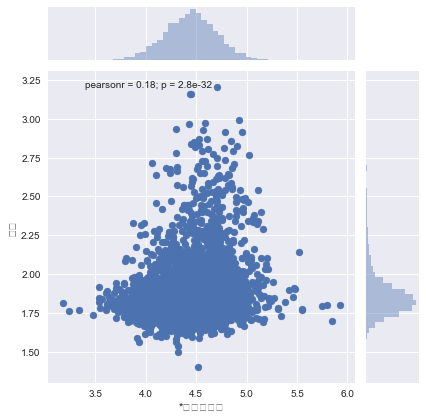

*r-谷氨酰基转换酶


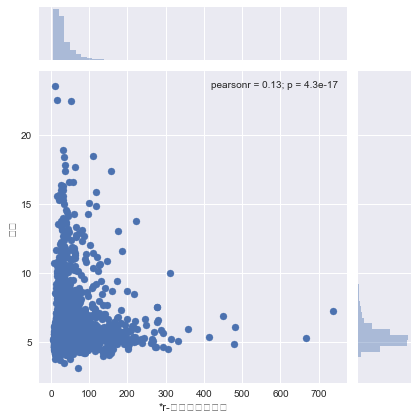

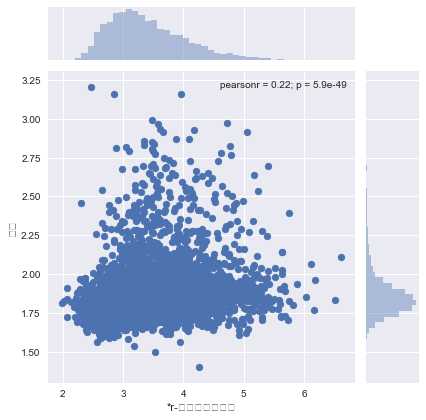

*总蛋白


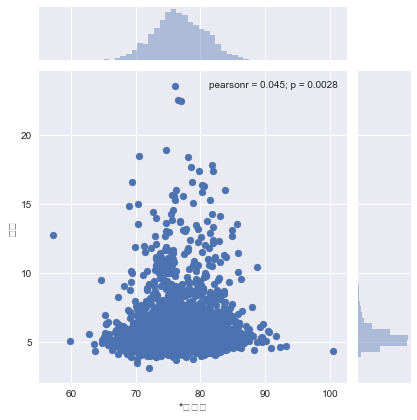

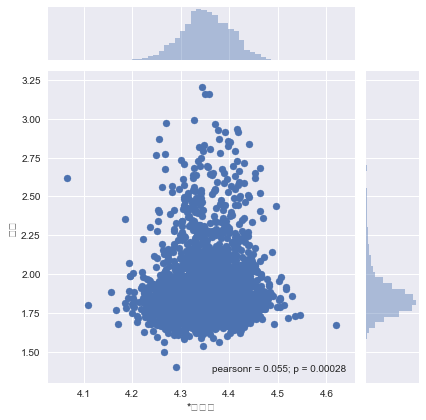

白蛋白


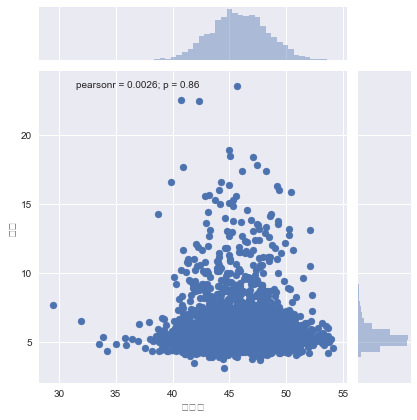

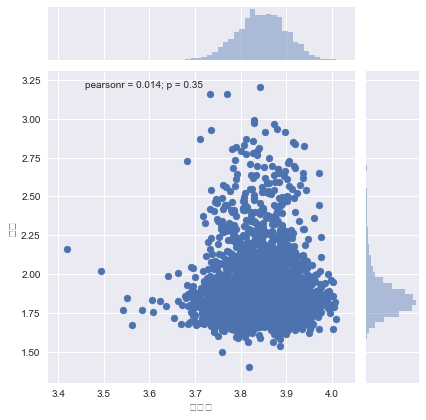

*球蛋白


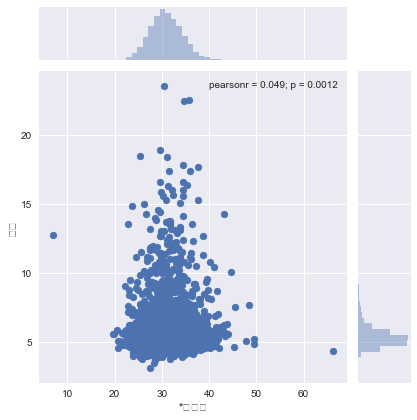

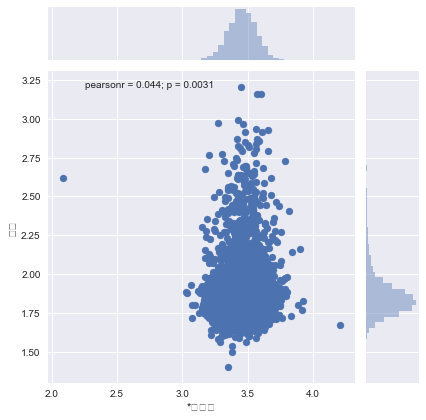

白球比例


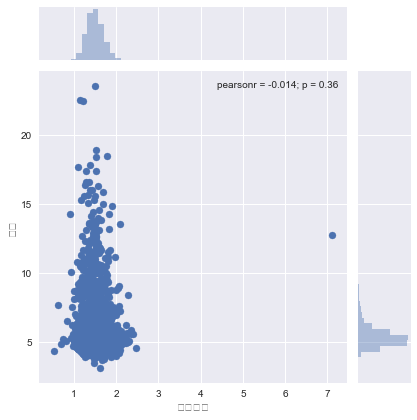

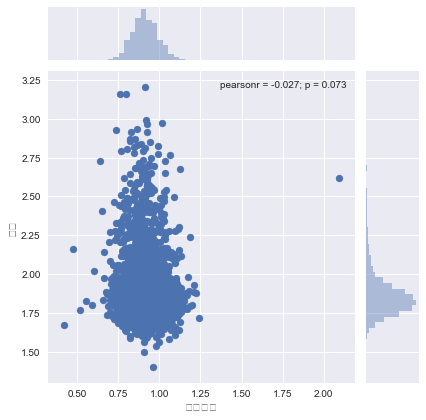

甘油三酯


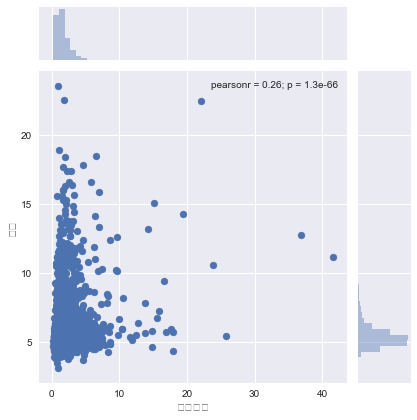

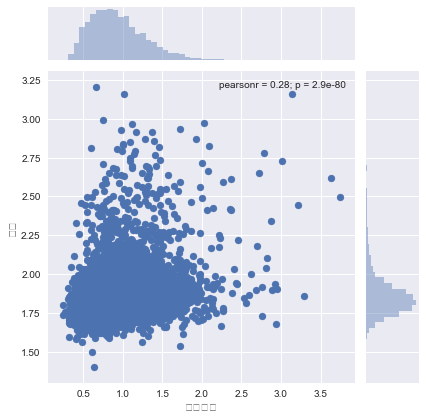

总胆固醇


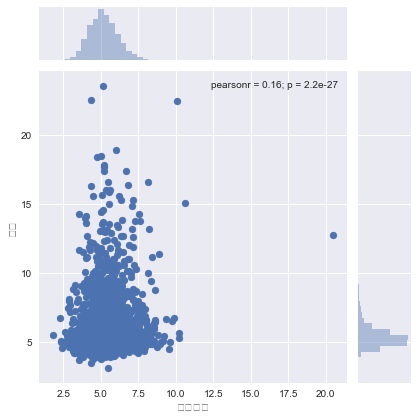

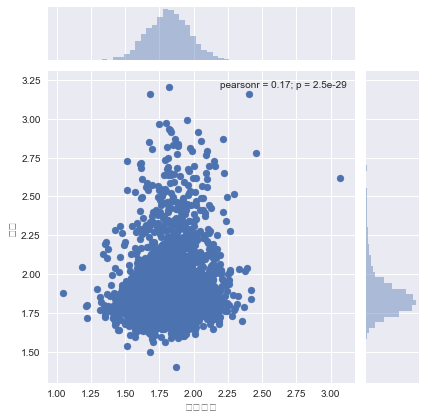

高密度脂蛋白胆固醇


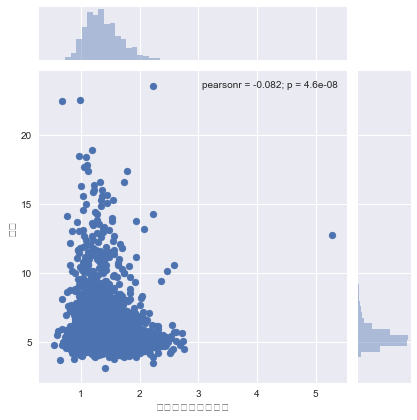

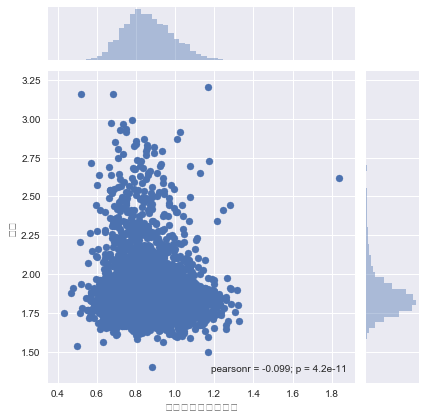

低密度脂蛋白胆固醇


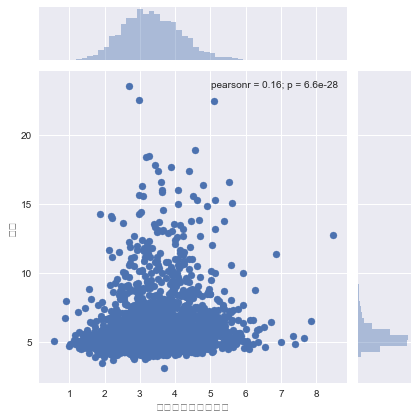

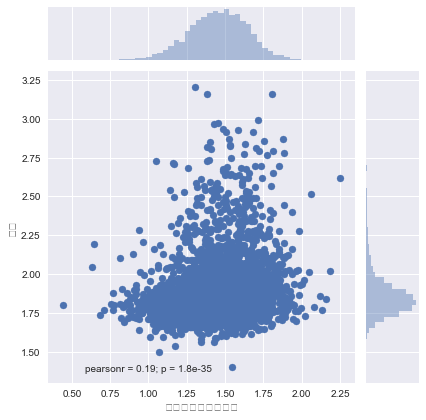

尿素


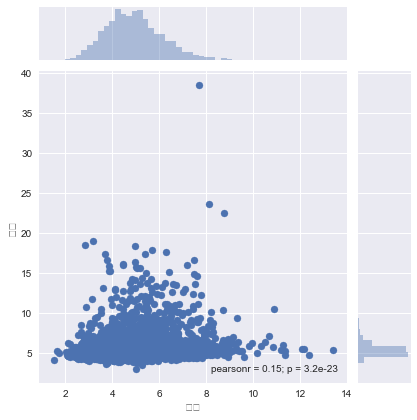

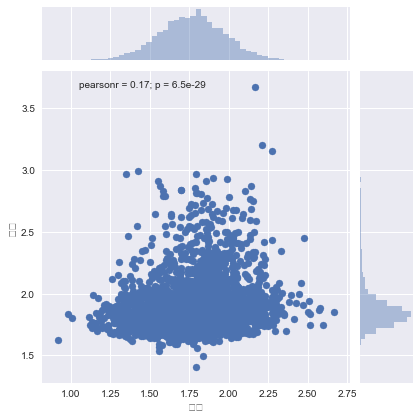

肌酐


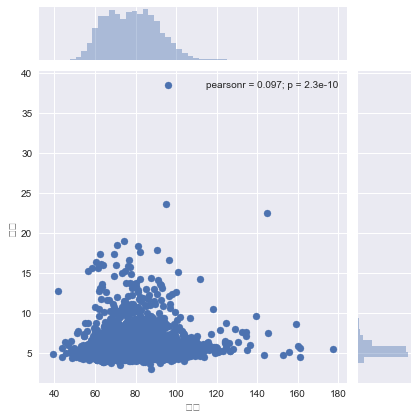

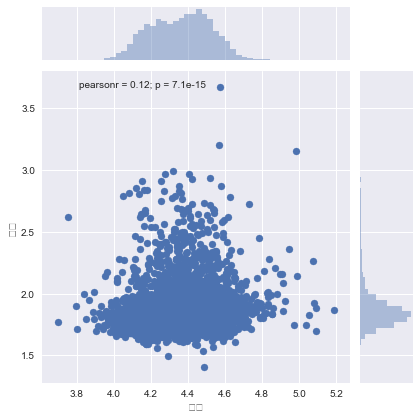

尿酸


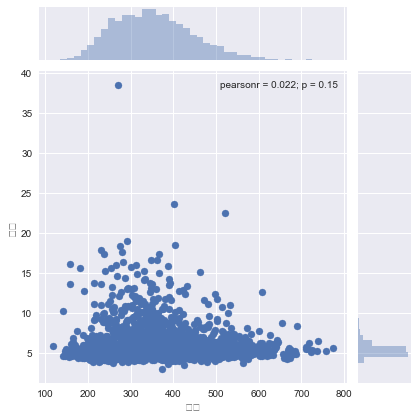

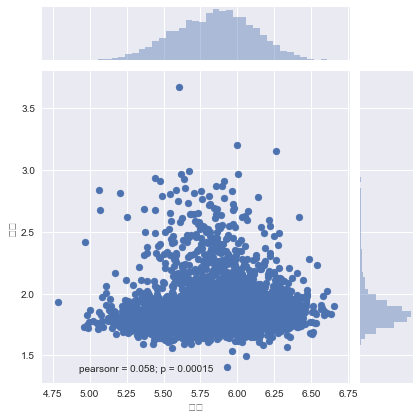

乙肝表面抗原


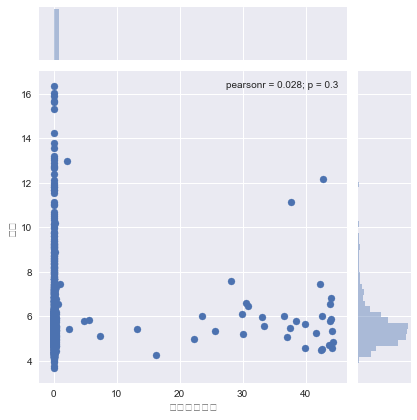

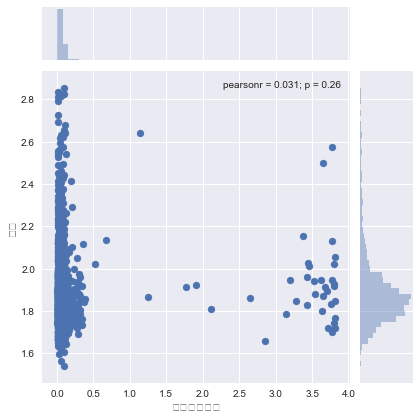

乙肝表面抗体


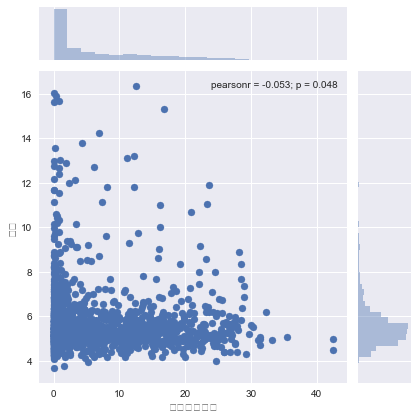

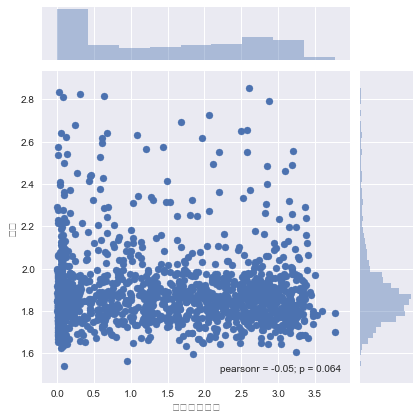

乙肝e抗原


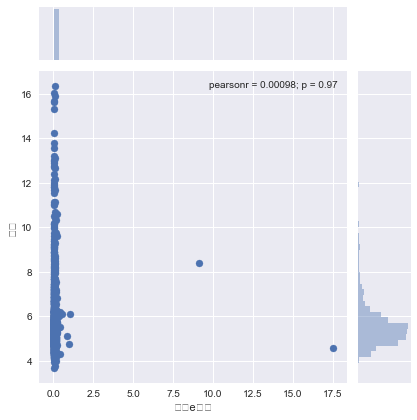

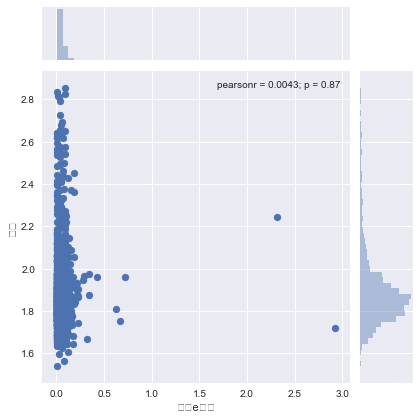

乙肝e抗体


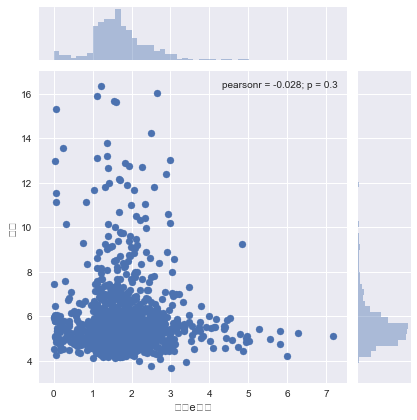

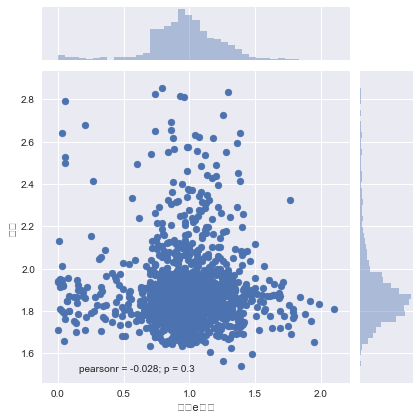

乙肝核心抗体


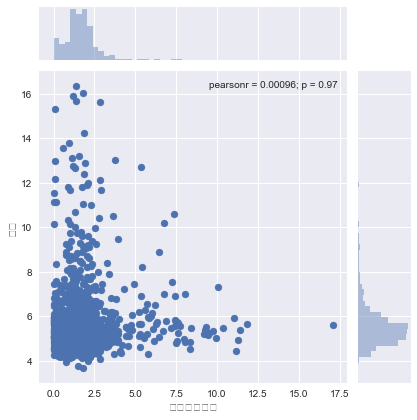

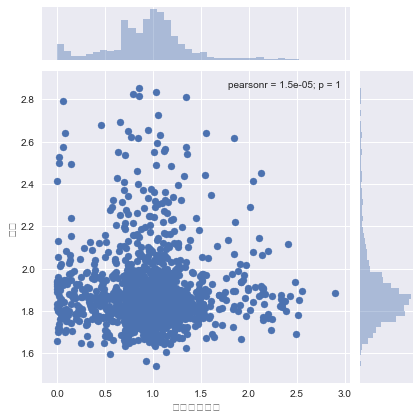

白细胞计数


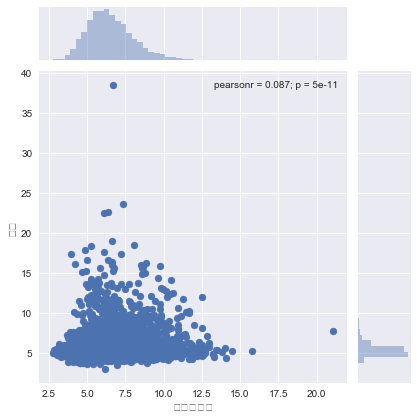

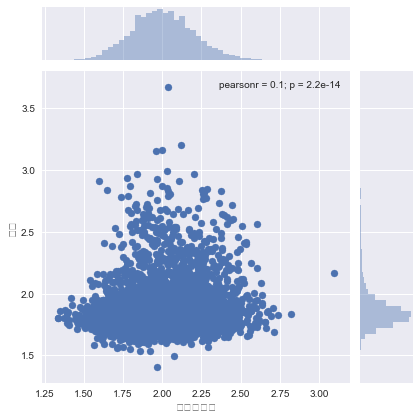

红细胞计数


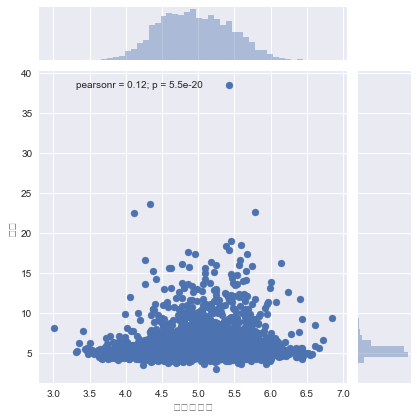

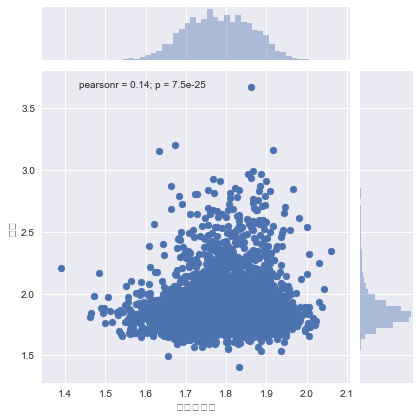

血红蛋白


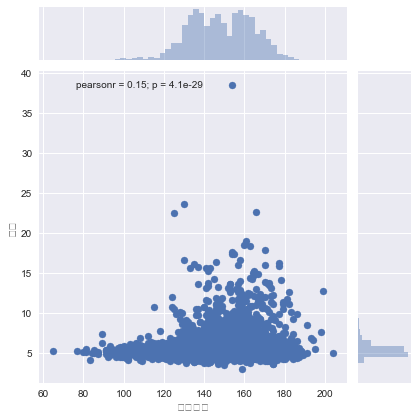

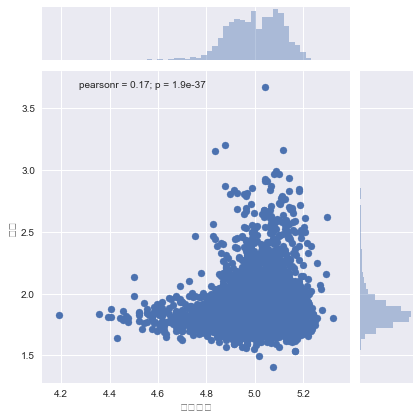

红细胞压积


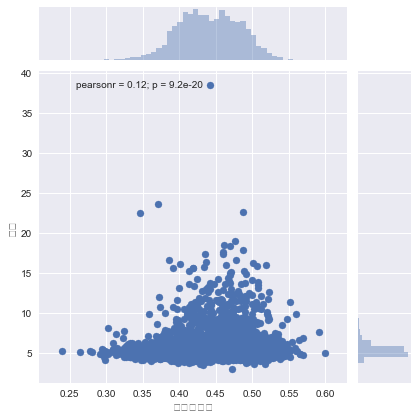

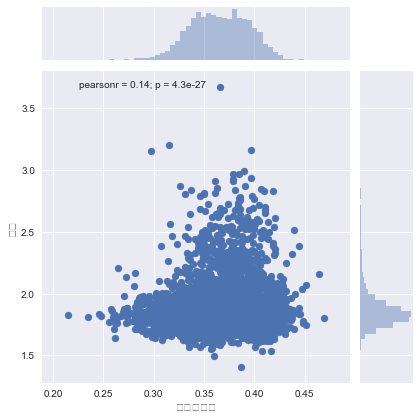

红细胞平均体积


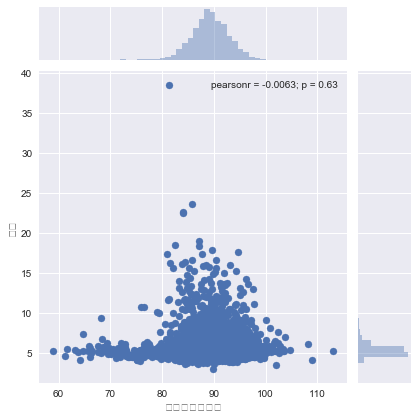

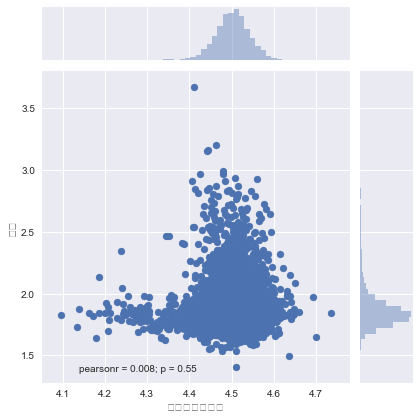

红细胞平均血红蛋白量


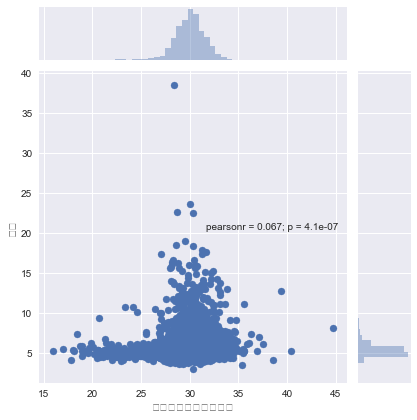

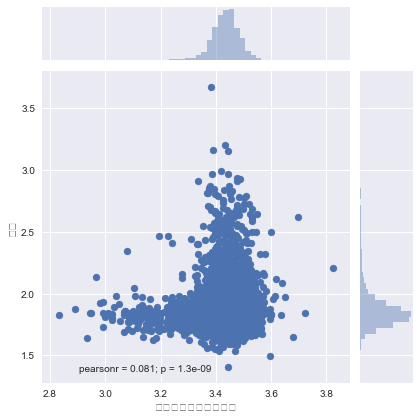

红细胞平均血红蛋白浓度


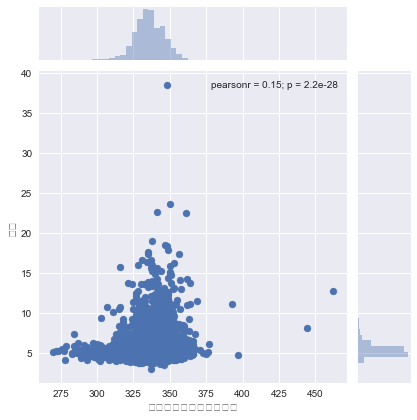

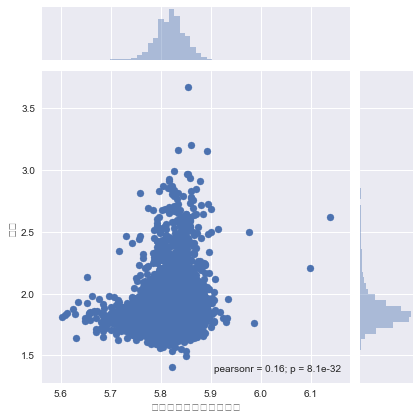

红细胞体积分布宽度


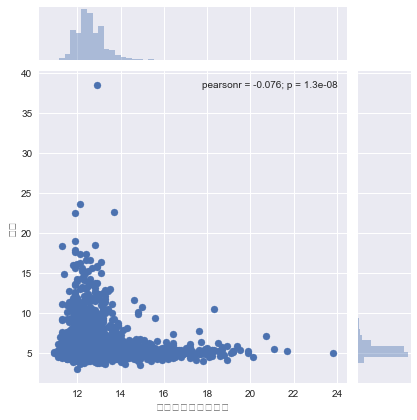

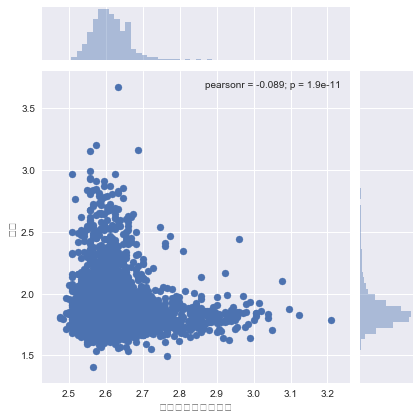

血小板计数


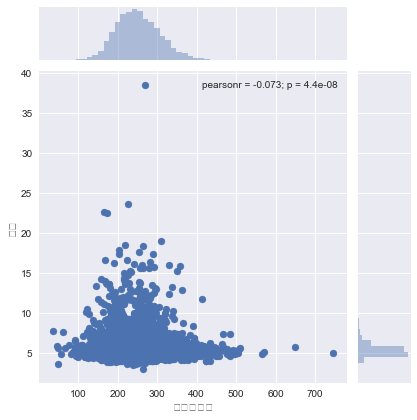

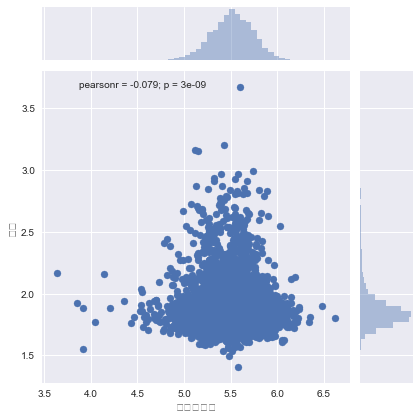

血小板平均体积


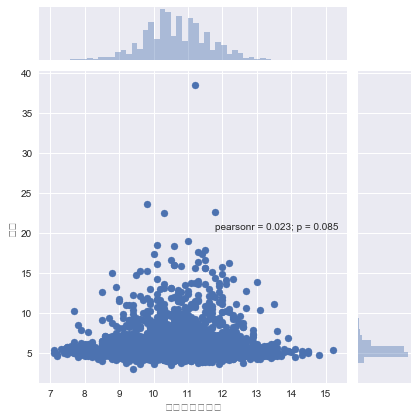

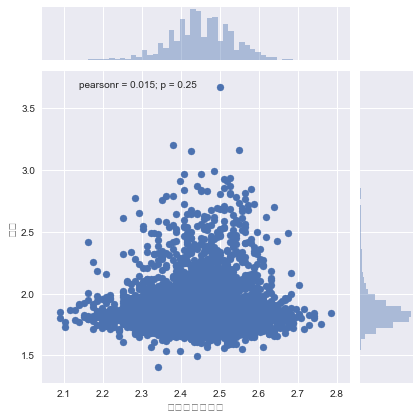

血小板体积分布宽度


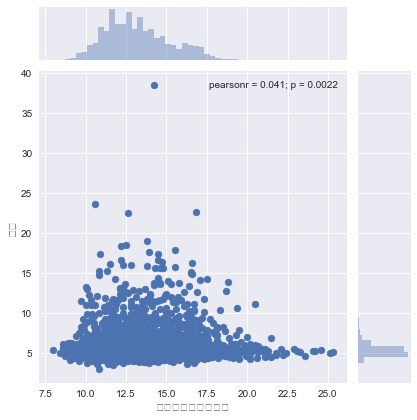

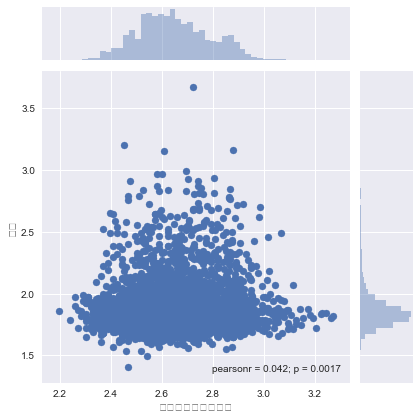

血小板比积


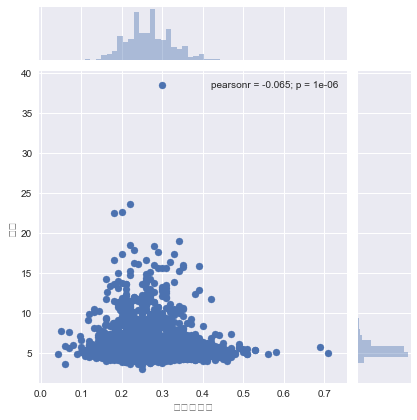

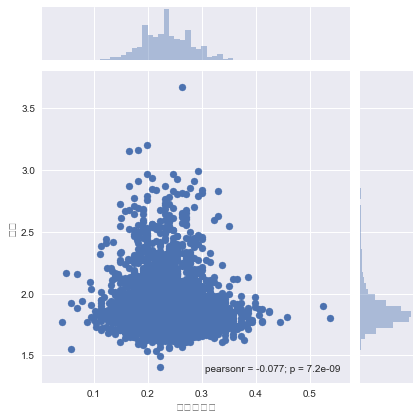

中性粒细胞%


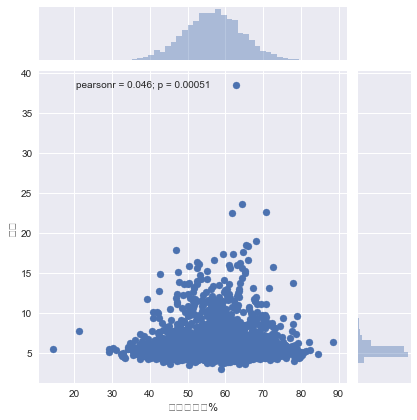

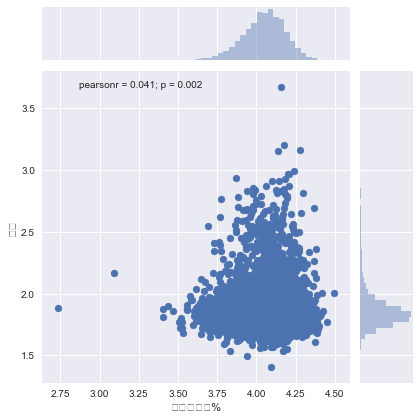

淋巴细胞%


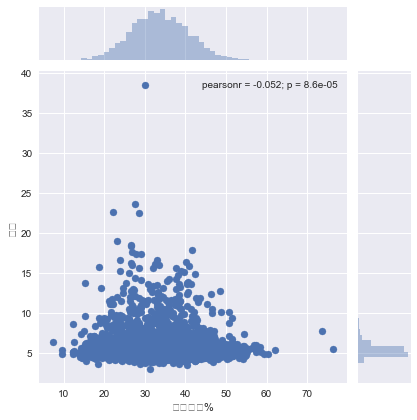

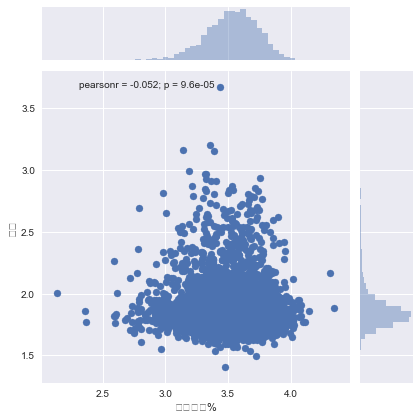

单核细胞%


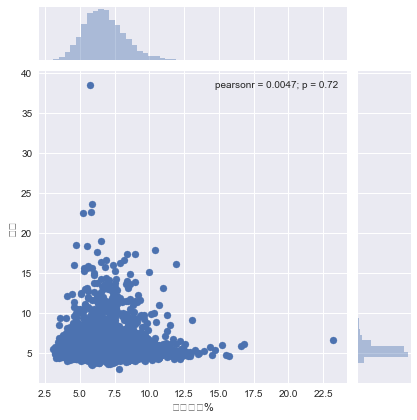

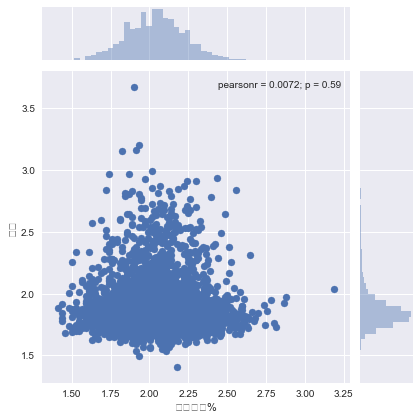

嗜酸细胞%


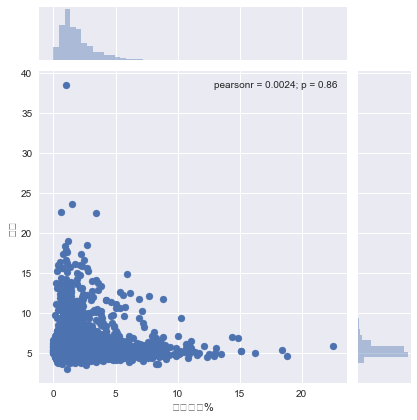

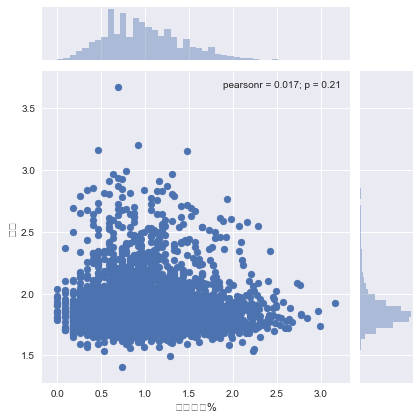

嗜碱细胞%


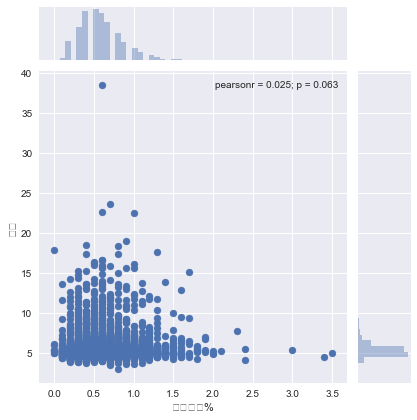

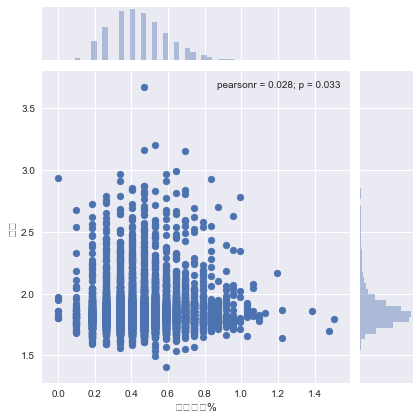

In [7]:
sns.set()
columns = train.columns.tolist()
for column in columns:
    if column != "血糖" and column != "gender":  
        print(column) 
        #print(train.loc[~train[column].isnull()][[column,"血糖"]])
        #sns.distplot(train.loc[~train[column].isnull()][column], kde=False)
        sns.jointplot(x=column, y="血糖", data=train.loc[~train[column].isnull()][[column,"血糖"]])
        #plt.scatter(train[column],train["血糖"])  
        #plt.show()
        #train[column].hist(bins=10)
        #train[column].plot(kind='kde')
        plt.show()
        sns.jointplot(x=column, y="血糖", data=train_bk.loc[~train_bk[column].isnull()][[column,"血糖"]])
        plt.show()

In [8]:
["白蛋白","球蛋白","血小板平均体积","中性粒细胞%","嗜酸细胞%"]

['白蛋白', '球蛋白', '血小板平均体积', '中性粒细胞%', '嗜酸细胞%']

In [9]:
["乙肝e抗原","乙肝核心抗体"]

['乙肝e抗原', '乙肝核心抗体']

In [10]:
#观察每列的缺失值

In [11]:
train.apply(lambda x : sum(x.isnull()))

gender            0
age               0
*天门冬氨酸氨基转换酶    1221
*丙氨酸氨基转换酶      1221
*碱性磷酸酶         1221
*r-谷氨酰基转换酶     1221
*总蛋白           1221
白蛋白            1221
*球蛋白           1221
白球比例           1221
甘油三酯           1219
总胆固醇           1219
高密度脂蛋白胆固醇      1219
低密度脂蛋白胆固醇      1219
尿素             1378
肌酐             1378
尿酸             1378
乙肝表面抗原         4279
乙肝表面抗体         4279
乙肝e抗原          4279
乙肝e抗体          4279
乙肝核心抗体         4279
白细胞计数            16
红细胞计数            16
血红蛋白             16
红细胞压积            16
红细胞平均体积          16
红细胞平均血红蛋白量       16
红细胞平均血红蛋白浓度      16
红细胞体积分布宽度        16
血小板计数            16
血小板平均体积          23
血小板体积分布宽度        23
血小板比积            23
中性粒细胞%           16
淋巴细胞%            16
单核细胞%            16
嗜酸细胞%            16
嗜碱细胞%            16
血糖                0
dtype: int64

In [15]:
sum(train["血红蛋白"].isnull())

16

In [16]:
sum(train["红细胞计数"].isnull())

16

In [17]:
sum(train["红细胞平均血红蛋白量"].isnull())

16

In [19]:
tmp = pd.concat([train["血红蛋白"],train["红细胞计数"],train["红细胞平均血红蛋白量"]], axis=1)

In [21]:
tmp.loc[tmp["血红蛋白"].isnull()]

,血红蛋白,红细胞计数,红细胞平均血红蛋白量
202,NaN,NaN,NaN
1145,NaN,NaN,NaN
2313,NaN,NaN,NaN
2445,NaN,NaN,NaN
2481,NaN,NaN,NaN
2610,NaN,NaN,NaN
3366,NaN,NaN,NaN
3473,NaN,NaN,NaN
3480,NaN,NaN,NaN
3541,NaN,NaN,NaN


In [22]:
tmp

,血红蛋白,红细胞计数,红细胞平均血红蛋白量
0,166.1,5.21,31.9
1,156.0,5.21,29.9
2,148.8,4.76,31.3
3,137.0,4.29,31.9
4,106.0,5.15,20.6
5,141.3,4.64,30.4
6,172.0,6.03,28.5
7,158.0,4.90,32.2
8,163.0,4.94,33.0
9,144.0,4.81,29.9


In [24]:
train["new"] = train["血糖"].apply(lambda x:np.log1p(x))

In [29]:
train["old"] = train["new"].apply(lambda x: np.exp(x)-1)

In [30]:
train.head()

,gender,age,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,白球比例,...,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖,new,old
0,1,41,24.96,23.10,99.59,20.23,76.88,49.60,27.28,1.82,...,17.4,0.164,54.1,34.2,6.5,4.7,0.6,6.06,1.954445,6.06
1,1,41,24.57,36.25,67.21,79.00,79.43,47.76,31.67,1.51,...,10.3,0.260,52.0,36.7,5.8,4.7,0.8,5.39,1.854734,5.39
2,1,46,20.82,15.23,63.69,38.17,86.23,48.00,38.23,1.26,...,16.6,0.199,48.1,40.3,7.7,3.2,0.8,5.59,1.885553,5.59
3,0,22,14.99,10.59,74.08,20.22,70.98,44.02,26.96,1.63,...,10.8,0.260,41.7,46.5,6.7,4.6,0.5,4.30,1.667707,4.30
4,0,48,20.07,14.78,75.79,22.72,78.05,41.83,36.22,1.15,...,14.0,0.350,56.6,33.1,9.1,0.6,0.6,5.42,1.859418,5.42
